In [1]:
#importing the necessary libraries
import pandas as pd
data=pd.read_csv('data/stud.csv')
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Feature engineering


In [2]:
#adding column for total score and average score for student.
data['total_score']=data['math_score']+data['reading_score']+data['writing_score']
data['average_score']=data['total_score']/3
# from the EDA since we have found that writing and reading score are higly correalted we can drop one of them
#data=data.drop(['writing_score'],axis=1)
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [3]:
#Preparing the X and Y variables
X=data.drop('average_score',axis=1)
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [4]:
y=data['average_score']
y.head()

0    72.666667
1    82.333333
2    92.666667
3    49.333333
4    76.333333
Name: average_score, dtype: float64

## Preprocessing


In [5]:
#we have to encode the categorical features and scale the features and create a column transformers for the transformations
num_feat=X.select_dtypes(exclude='object').columns
cat_feat=X.select_dtypes(include='object').columns

#import the encoder and scaler
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer=StandardScaler()
categ_transformer=OneHotEncoder()

preprocessor=ColumnTransformer(
    [
    ("OneHotEncoder",categ_transformer,cat_feat),
    ("Standardscaler",numeric_transformer,num_feat)]
)


In [6]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(),
                                 Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')),
                                ('Standardscaler', StandardScaler(),
                                 Index(['math_score', 'reading_score', 'writing_score', 'total_score'], dtype='object'))])

In [7]:
X=preprocessor.fit_transform(X)

In [8]:
X.shape

(1000, 21)

In [9]:
#separating the dataset into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [10]:
X_train.shape

(800, 21)

In [11]:
y_train.shape

(800,)

In [12]:
X_test.shape

(200, 21)

In [13]:
y_test.shape

(200,)

## Model training

In [14]:
#importing all the models and the evaluation metrics
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import numpy as np

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [15]:
# creating a function for model evaluation
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mse)
    r2_square=r2_score(true,predicted)
    

    return mae,mse,rmse,r2_square

In [16]:
models={
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list=[]
r2_list_train=[]
mae_list_train=[]
mse_list_train=[]
rmse_list_train=[]

r2_list_test=[]
mae_list_test=[]
mse_list_test=[]
rmse_list_test=[]
  # Train model
for i in range (len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train, y_train)
    print('{} is trained'.format(model))

    #make predictions
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)

    #Evaluate the model
    model_train_mae,model_train_mse,model_train_rmse,model_train_r2_score=evaluate_model(y_train,y_train_pred)
    model_test_mae,model_test_mse,model_test_rmse,model_test_r2_score=evaluate_model(y_test,y_test_pred)
    
    model_list.append(list(models.keys())[i])
#trainig set metrics
    r2_list_train.append(model_train_r2_score)
    mae_list_train.append(model_train_mae)
    mse_list_train.append(model_train_mse)
    rmse_list_train.append(model_train_rmse)

#test set metrics
    r2_list_test.append(model_test_r2_score)
    mae_list_test.append(model_test_mae)
    mse_list_test.append(model_test_mse)
    rmse_list_test.append(model_test_rmse)


LinearRegression() is trained
Lasso() is trained
Ridge() is trained
KNeighborsRegressor() is trained
DecisionTreeRegressor() is trained
RandomForestRegressor() is trained
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) is trained
<catboost.core.CatBoostRegressor object at 0x000001AD94405D90> is train

In [17]:
model_performance_test = pd.DataFrame({

    'Model':model_list,
    'R2_Score':r2_list_test,
    'MSE':mse_list_test,
    'MAE':mae_list_test,
    'RMSE':rmse_list_test

    })
model_performance_test

,Model,R2_Score,MSE,MAE,RMSE
0,Linear Regression,1.000000,1.572042e-28,1.085354e-14,1.253811e-14
1,Lasso,0.994801,1.114558e+00,8.311744e-01,1.055726e+00
2,Ridge,1.000000,4.148499e-05,4.894631e-03,6.440884e-03
3,K-Neighbors Regressor,0.966842,7.108022e+00,1.923000e+00,2.666087e+00
4,Decision Tree,0.997815,4.683333e-01,9.500000e-02,6.843488e-01
5,Random Forest Regressor,0.996164,8.222362e-01,1.177000e-01,9.067724e-01
6,XGBRegressor,0.997431,5.507381e-01,1.759249e-01,7.421173e-01
7,CatBoosting Regressor,0.994961,1.080108e+00,3.137565e-01,1.039282e+00
8,AdaBoost Regressor,0.992671,1.571137e+00,7.645744e-01,1.253450e+00


In [18]:
model_performance_train = pd.DataFrame({

    'Model':model_list,
    'R2_Score':r2_list_train,
    'MSE':mse_list_train,
    'MAE':mae_list_train,
    'RMSE':rmse_list_train

    })
model_performance_train

,Model,R2_Score,MSE,MAE,RMSE
0,Linear Regression,1.000000,1.524868e-28,1.051159e-14,1.234856e-14
1,Lasso,0.994895,1.018143e+00,8.075025e-01,1.009031e+00
2,Ridge,1.000000,3.439478e-05,4.750440e-03,5.864707e-03
3,K-Neighbors Regressor,0.980312,3.926744e+00,1.557000e+00,1.981601e+00
4,Decision Tree,1.000000,9.718766e-30,8.171241e-16,3.117494e-15
5,Random Forest Regressor,0.999920,1.602815e-02,2.458750e-02,1.266023e-01
6,XGBRegressor,0.999999,1.495464e-04,8.344541e-03,1.222892e-02
7,CatBoosting Regressor,0.999917,1.650188e-02,1.035561e-01,1.284596e-01
8,AdaBoost Regressor,0.995793,8.390569e-01,7.259435e-01,9.160005e-01


#### Linear regression shows the best result with r2 score.


In [19]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 100.00


### plot of y test and y predicted

Text(0, 0.5, 'Predicted')

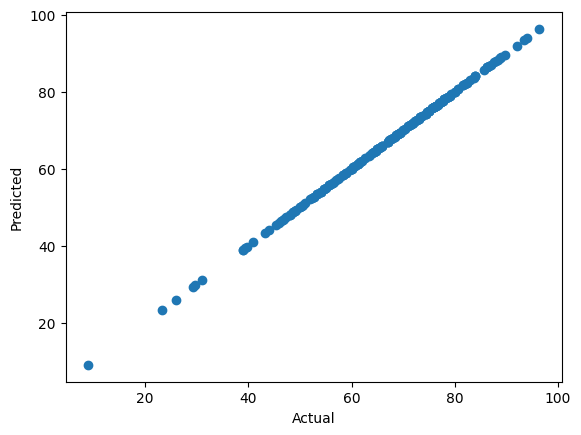

In [20]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='average_score'>

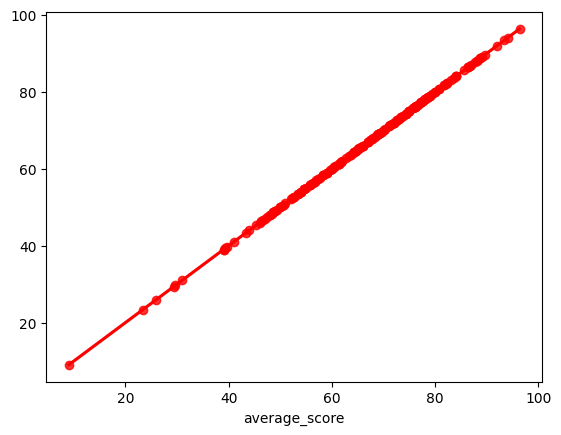

In [24]:
import seaborn as sns
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red')

In [22]:
y_pred

array([87.        , 64.        , 75.        , 74.66666667, 81.66666667,
       78.        , 67.33333333, 59.        , 77.33333333, 48.66666667,
       47.        , 26.        , 76.        , 58.33333333, 83.66666667,
       75.        , 49.        , 48.33333333, 53.33333333, 61.33333333,
       73.33333333, 49.33333333, 62.66666667, 44.        , 79.33333333,
       77.33333333, 72.        , 50.        , 41.        , 55.66666667,
       60.        , 67.        , 60.33333333, 73.        , 77.33333333,
       51.        , 76.        , 74.33333333, 75.        ,  9.        ,
       78.        , 64.33333333, 65.33333333, 61.33333333, 84.        ,
       65.66666667, 71.        , 29.33333333, 86.33333333, 78.66666667,
       72.        , 71.33333333, 78.66666667, 54.        , 71.66666667,
       72.33333333, 83.        , 54.66666667, 81.66666667, 89.        ,
       43.33333333, 80.66666667, 79.        , 61.66666667, 87.66666667,
       73.66666667, 65.        , 54.66666667, 64.66666667, 88.66

In [23]:
##Actual and predicted value
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,87.000000,87.000000,0.000000e+00
737,64.000000,64.000000,7.105427e-15
740,75.000000,75.000000,1.421085e-14
660,74.666667,74.666667,1.421085e-14
411,81.666667,81.666667,1.421085e-14
...,...,...,...
408,55.000000,55.000000,7.105427e-15
332,57.000000,57.000000,7.105427e-15
208,77.000000,77.000000,1.421085e-14
613,72.000000,72.000000,1.421085e-14
